## Predicting Mental Health Disorders Based on Symptomatic Data

### Problem Statement
Mental health disorders affect a significant portion of the global population, impacting individuals' well-being and overall quality of life. <br>Identifying and addressing mental health issues early is crucial for effective intervention and support.

## Above Dataset
#### =================================
The dataset used in this project consists of various symptomatic features related to mental health, such as trouble sleeping, nightmares, anger issues, and more. <br> Each individual in the dataset is labeled with a specific mental health 
disorder, creating a supervised learning scenario.

In [1]:
# !pip install openpyxl pandas seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
health = pd.read_excel("Mental disorder symptoms.xlsx")

In [4]:
health.sample(3)

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
171,16,1,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,MDD
281,25,1,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,anexiety
631,16,1,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,MDD


In [5]:
health.shape

(637, 29)

In [6]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    637 non-null    int64 
 1   feeling.nervous              637 non-null    int64 
 2   panic                        637 non-null    int64 
 3   breathing.rapidly            637 non-null    int64 
 4   sweating                     637 non-null    int64 
 5   trouble.in.concentration     637 non-null    int64 
 6   having.trouble.in.sleeping   637 non-null    int64 
 7   having.trouble.with.work     637 non-null    int64 
 8   hopelessness                 637 non-null    int64 
 9   anger                        637 non-null    int64 
 10  over.react                   637 non-null    int64 
 11  change.in.eating             637 non-null    int64 
 12  suicidal.thought             637 non-null    int64 
 13  feeling.tired                637 no

In [7]:
health.describe()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.0,637.000000
mean,22.189953,0.638932,0.273155,0.549451,0.368917,0.365777,0.638932,0.273155,0.232339,0.324961,...,0.459969,0.329670,0.364207,0.340659,0.408163,0.244898,0.102041,0.288854,0.0,0.230769
std,8.395680,0.480688,0.445930,0.497940,0.482891,0.482026,0.480688,0.445930,0.422656,0.468728,...,0.498787,0.470463,0.481585,0.474303,0.491880,0.430365,0.302940,0.453586,0.0,0.421656
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,21.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
max,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [8]:
health.columns

Index(['ag+1:629e', 'feeling.nervous', 'panic', 'breathing.rapidly',
       'sweating', 'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'introvert',
       'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself', 'hallucinations',
       'repetitive.behaviour', 'seasonally', 'increased.energy', 'Disorder'],
      dtype='object')

In [9]:
health.isnull().sum()

ag+1:629e                      0
feeling.nervous                0
panic                          0
breathing.rapidly              0
sweating                       0
trouble.in.concentration       0
having.trouble.in.sleeping     0
having.trouble.with.work       0
hopelessness                   0
anger                          0
over.react                     0
change.in.eating               0
suicidal.thought               0
feeling.tired                  0
close.friend                   0
social.media.addiction         0
weight.gain                    0
introvert                      0
popping.up.stressful.memory    0
having.nightmares              0
avoids.people.or.activities    0
feeling.negative               0
trouble.concentrating          0
blamming.yourself              0
hallucinations                 0
repetitive.behaviour           0
seasonally                     0
increased.energy               0
Disorder                       0
dtype: int64

In [10]:
health.rename(columns={'ag+1:629e': 'age'}, inplace=True)
health = health.rename(columns={'having.trouble.in.sleeping':'trouble.sleeping'})
health = health.rename(columns={'having.trouble.with.work':'trouble.with.work'})
health = health.rename(columns={'having.nightmares':'nightmares'})

In [11]:
health.sample(2)

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
321,31,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
331,14,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,sleeping disorder


In [12]:
health.drop(columns=['seasonally'], inplace=True)

### Some preliminary data visualisation and analysis

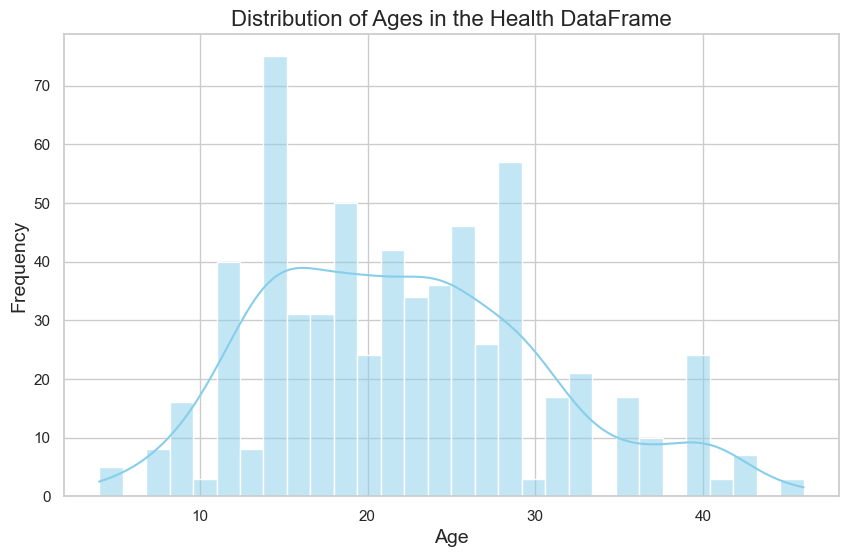

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(health['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Ages in the Health DataFrame', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [14]:
Disorders = health.Disorder.unique()
Disorders

array(['MDD', 'ASD', 'Loneliness', 'bipolar', 'anexiety', 'PTSD',
       'sleeping disorder', 'psychotic deprission', 'eating disorder',
       'ADHD', 'PDD', 'OCD'], dtype=object)

In [15]:
health['Disorder'].replace({'anexiety': 'anxiety', 'psychotic deprission': 'psychotic depression'}, inplace=True)

Disorders = health['Disorder'].unique()
print(Disorders)

['MDD' 'ASD' 'Loneliness' 'bipolar' 'anxiety' 'PTSD' 'sleeping disorder'
 'psychotic depression' 'eating disorder' 'ADHD' 'PDD' 'OCD']


C:\Users\Admin\AppData\Local\Temp\ipykernel_12452\1818034034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health['Disorder'].replace({'anexiety': 'anxiety', 'psychotic deprission': 'psychotic depression'}, inplace=True)


In [16]:
# Sum the incidences of the various symptoms
symptom_incidences = health[health.columns[1:27]].sum()

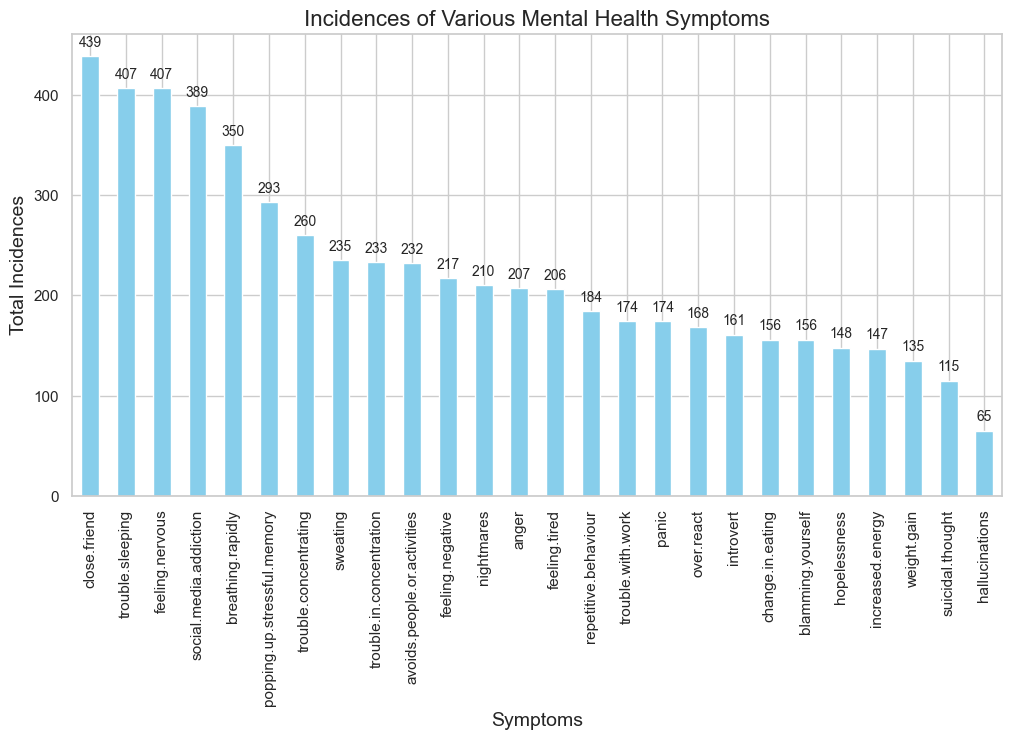

In [17]:
# Plotting
plt.figure(figsize=(12, 6))
ax = symptom_incidences.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Add labels and a title
plt.title('Incidences of Various Mental Health Symptoms', fontsize=16)
plt.xlabel('Symptoms', fontsize=14)
plt.ylabel('Total Incidences', fontsize=14)

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Show the plot
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12452\2519984627.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Disorder', data=health, palette='Set2')


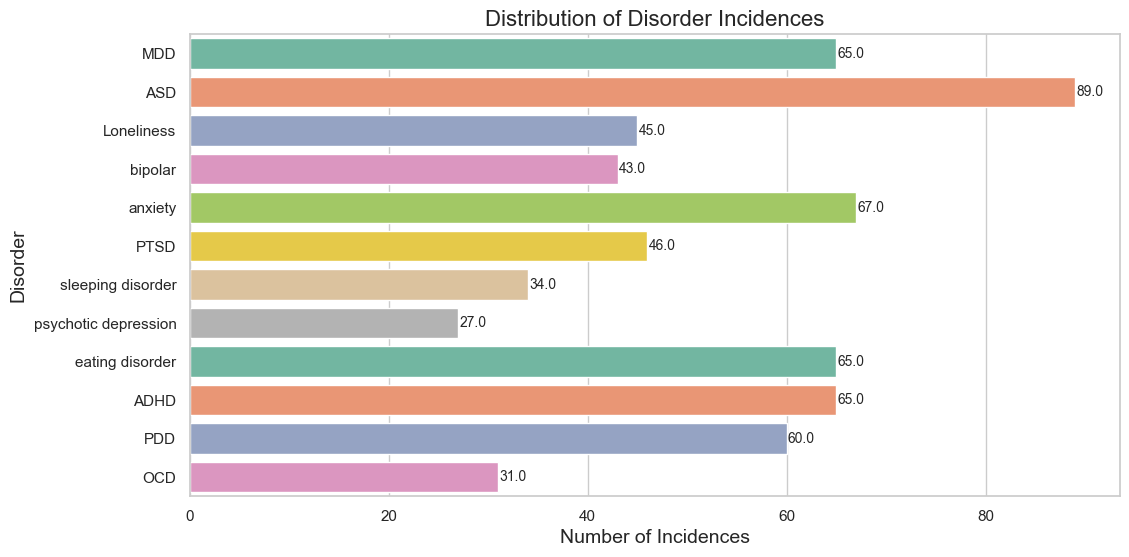

In [18]:
incidences = health.Disorder.value_counts()

plt.figure(figsize=(12, 6))
ax = sns.countplot(y='Disorder', data=health, palette='Set2')
plt.title('Distribution of Disorder Incidences', fontsize=16)
plt.xlabel('Number of Incidences', fontsize=14)
plt.ylabel('Disorder', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2.), ha='left', va='center', fontsize=10)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12452\49305542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disorder', y='age', data=health, palette='Set2')


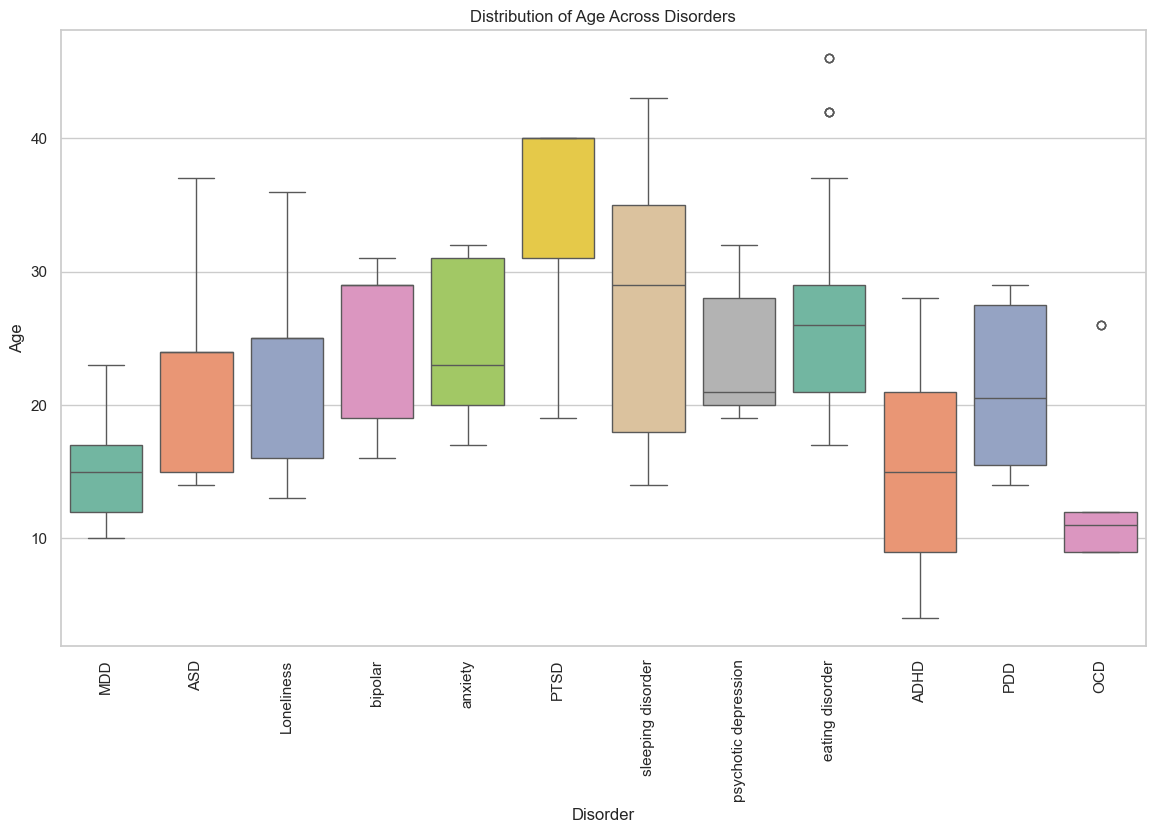

In [19]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Disorder', y='age', data=health, palette='Set2')
plt.title('Distribution of Age Across Disorders')
plt.xlabel('Disorder')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

In [20]:
# # Use get_dummies to perform one-hot encoding
# health = pd.get_dummies(health, columns=['Disorder'], prefix='Disorder')

# # Display the DataFrame with the new one-hot encoded columns
# print(health.head())

In [21]:
# correlation_matrix = health.corr()
# plt.figure(figsize=(14, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# plt.title('Correlation Heatmap', fontsize=16)
# plt.show()

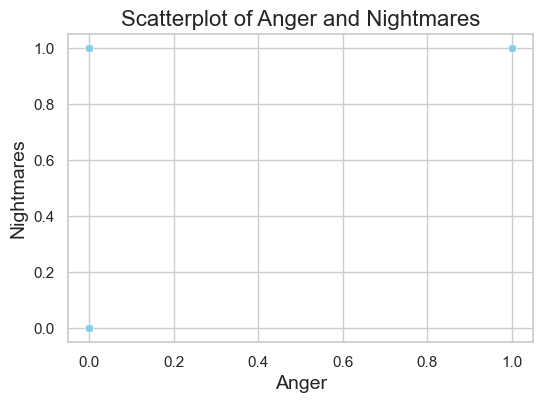

In [22]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='anger', y='nightmares', data=health, color='skyblue')
plt.title('Scatterplot of Anger and Nightmares', fontsize=16)
plt.xlabel('Anger', fontsize=14)
plt.ylabel('Nightmares', fontsize=14)
plt.show()

In [23]:
anger_counts = health['anger'].value_counts()
nightmares_counts = health['nightmares'].value_counts()

print("Value Counts for 'anger' column:")
print(anger_counts)

print("\nValue Counts for 'nightmares' column:")
print(nightmares_counts)

Value Counts for 'anger' column:
anger
0    430
1    207
Name: count, dtype: int64

Value Counts for 'nightmares' column:
nightmares
0    427
1    210
Name: count, dtype: int64


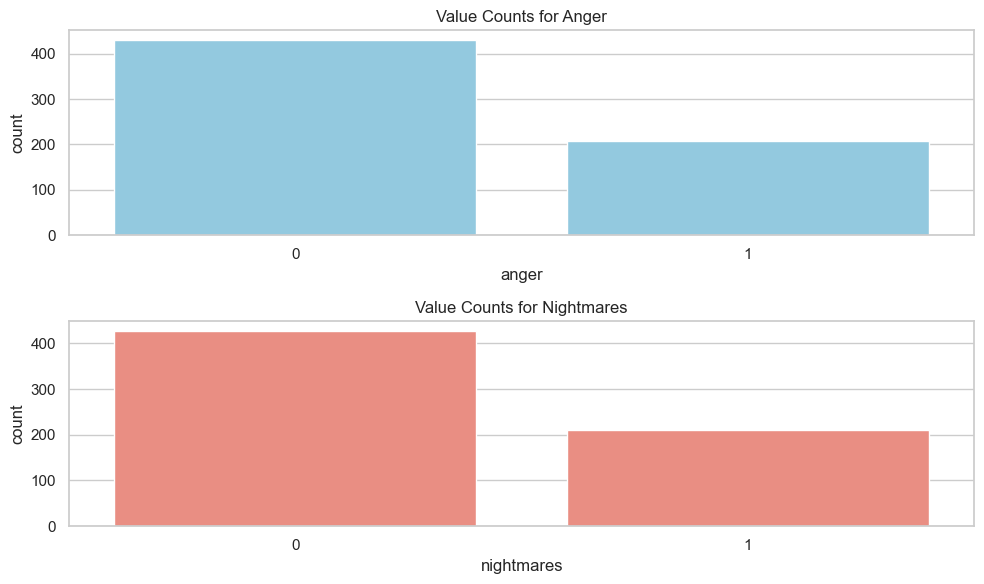

In [24]:
plt.figure(figsize=(10, 6))

# Plot the value counts for 'anger'
plt.subplot(2, 1, 1)
sns.countplot(x='anger', data=health, color='skyblue')
plt.title('Value Counts for Anger')

# Plot the value counts for 'nightmares'
plt.subplot(2, 1, 2)
sns.countplot(x='nightmares', data=health, color='salmon')
plt.title('Value Counts for Nightmares')

plt.tight_layout()
plt.show()

In [25]:
from sklearn.feature_selection import RFE

X = health.drop('Disorder',axis=1)
y = health['Disorder']

# Perform Recursive Feature Elimination (RFE) with Logistic Regression
logreg = LogisticRegression(random_state=42)
rfe = RFE(logreg, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)

# Display the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Features: Index(['hopelessness', 'over.react', 'introvert',
       'popping.up.stressful.memory', 'nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself', 'increased.energy'],
      dtype='object')


In [27]:
meaningful_names = {
    'sweating': 'Sweating',
    'trouble.in.concentration': 'Trouble in Concentration',
    'trouble.sleeping': 'Trouble Sleeping',
    'close.friend': 'Close Friend',
    'introvert': 'Introvert',
    'popping.up.stressful.memory': 'Stressful Memory',
    'avoids.people.or.activities': 'Avoids People or Activities',
    'feeling.negative': 'Feeling Negative',
    'blamming.yourself': 'Blaming Yourself',
    'increased.energy': 'Increased Energy',
}

selected_features = ['sweating', 'trouble.in.concentration', 'trouble.sleeping', 'close.friend', 'introvert',
                     'popping.up.stressful.memory', 'avoids.people.or.activities', 'feeling.negative',
                     'blamming.yourself', 'increased.energy']

In [28]:
selected_features_meaningful = [meaningful_names.get(feature, feature) for feature in selected_features]
print("Selected Features (Meaningful Names):", selected_features_meaningful)

Selected Features (Meaningful Names): ['Sweating', 'Trouble in Concentration', 'Trouble Sleeping', 'Close Friend', 'Introvert', 'Stressful Memory', 'Avoids People or Activities', 'Feeling Negative', 'Blaming Yourself', 'Increased Energy']


In [29]:
X = health[selected_features]
y = health['Disorder']

In [30]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [32]:
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
# print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Model:
Accuracy: 0.9895833333333334
Classification Report:
                       precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00        29
                 ASD       1.00      1.00      1.00        22
          Loneliness       1.00      1.00      1.00        18
                 MDD       0.92      1.00      0.96        23
                 OCD       1.00      1.00      1.00        11
                 PDD       1.00      0.88      0.93        16
                PTSD       1.00      1.00      1.00         9
             anxiety       1.00      1.00      1.00        13
             bipolar       1.00      1.00      1.00         9
     eating disorder       1.00      1.00      1.00        25
psychotic depression       1.00      1.00      1.00        11
   sleeping disorder       1.00      1.00      1.00         6

            accuracy                           0.99       192
           macro avg       0.99      0.99      0.99    

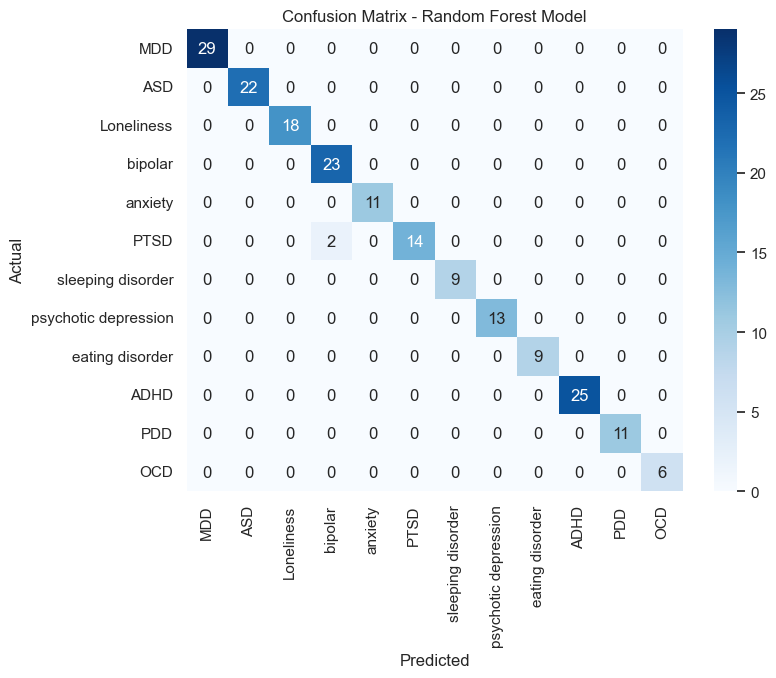

In [33]:
class_names = ['MDD', 'ASD', 'Loneliness', 'bipolar', 'anxiety', 'PTSD',
               'sleeping disorder', 'psychotic depression', 'eating disorder',
               'ADHD', 'PDD', 'OCD']

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()


In [34]:
# Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [35]:
print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
# print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))


Logistic Regression Model:
Accuracy: 0.9739583333333334
Classification Report:
                       precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00        29
                 ASD       1.00      1.00      1.00        22
          Loneliness       1.00      1.00      1.00        18
                 MDD       0.91      0.87      0.89        23
                 OCD       1.00      1.00      1.00        11
                 PDD       1.00      0.88      0.93        16
                PTSD       1.00      1.00      1.00         9
             anxiety       0.81      1.00      0.90        13
             bipolar       1.00      1.00      1.00         9
     eating disorder       1.00      1.00      1.00        25
psychotic depression       1.00      1.00      1.00        11
   sleeping disorder       1.00      1.00      1.00         6

            accuracy                           0.97       192
           macro avg       0.98      0.98      0.

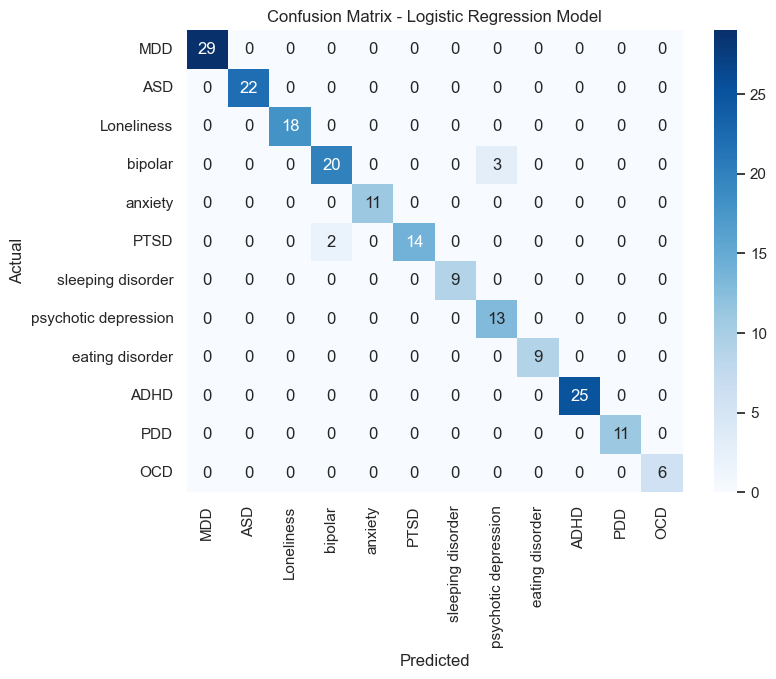

In [36]:
class_names = ['MDD', 'ASD', 'Loneliness', 'bipolar', 'anxiety', 'PTSD',
               'sleeping disorder', 'psychotic depression', 'eating disorder',
               'ADHD', 'PDD', 'OCD']

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, lr_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()


In [37]:
from sklearn.svm import SVC

svc_model = SVC(kernel='sigmoid', C= 0.5, gamma= 0.5)  # You can adjust 'kernel', 'C', and 'gamma' based on your preference
svc_model.fit(X_train, y_train)

# Make predictions on the test set
svc_predictions = svc_model.predict(X_test)

In [38]:
# Evaluate the SVC model
print("SVC Model:")
print("Accuracy:", accuracy_score(y_test, svc_predictions))
# print("Confusion Matrix:\n", confusion_matrix(y_test, svc_predictions))
print("Classification Report:\n", classification_report(y_test, svc_predictions))

SVC Model:
Accuracy: 0.765625
Classification Report:
                       precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00        29
                 ASD       0.71      1.00      0.83        22
          Loneliness       1.00      1.00      1.00        18
                 MDD       0.70      0.61      0.65        23
                 OCD       1.00      1.00      1.00        11
                 PDD       0.73      1.00      0.84        16
                PTSD       0.32      1.00      0.49         9
             anxiety       0.29      0.15      0.20        13
             bipolar       1.00      0.11      0.20         9
     eating disorder       1.00      1.00      1.00        25
psychotic depression       0.00      0.00      0.00        11
   sleeping disorder       0.00      0.00      0.00         6

            accuracy                           0.77       192
           macro avg       0.65      0.66      0.60       192
        weight

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

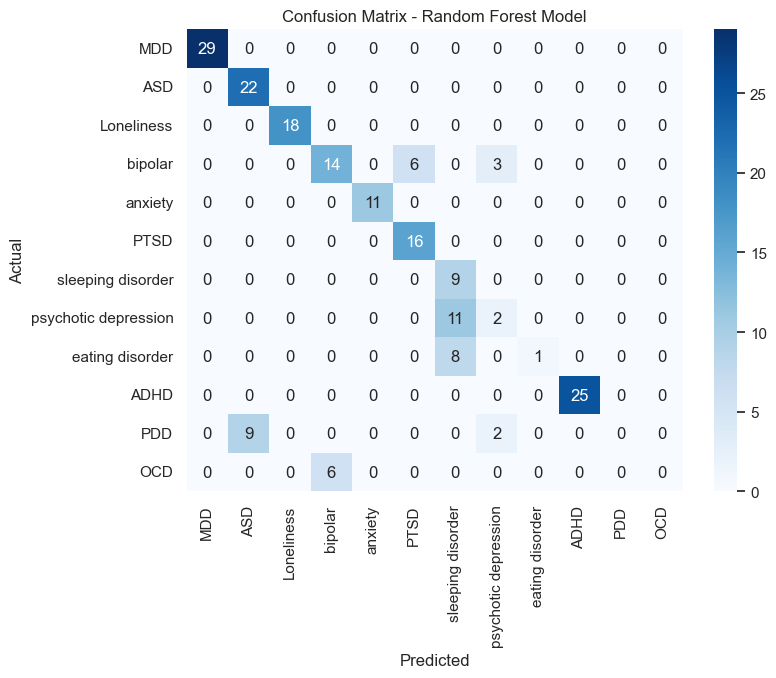

In [39]:
class_names = ['MDD', 'ASD', 'Loneliness', 'bipolar', 'anxiety', 'PTSD',
               'sleeping disorder', 'psychotic depression', 'eating disorder',
               'ADHD', 'PDD', 'OCD']

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, svc_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model Comparison:
                 Model  Accuracy  Precision (weighted avg)  \
0        Random Forest  0.989583                  0.990417   
1  Logistic Regression  0.973958                  0.976415   
2                  SVC  0.765625                  0.739356   

   Recall (weighted avg)  F1 Score (weighted avg)  
0               0.989583                 0.989453  
1               0.973958                 0.974130  
2               0.765625                 0.721317  


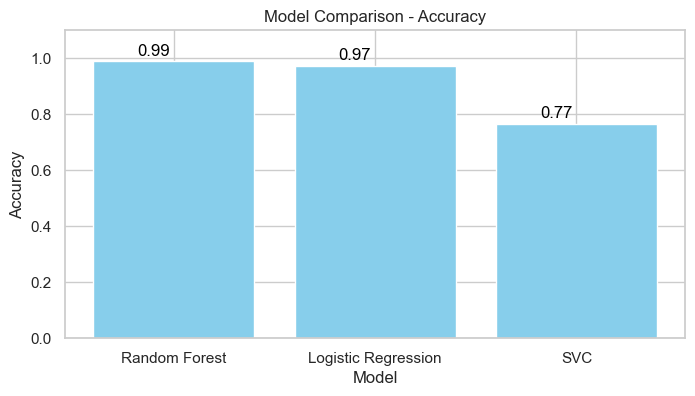

In [41]:
# Store the model names
model_names = ['Random Forest', 'Logistic Regression', 'SVC']

# Store the accuracy scores for each model
accuracy_scores = [
                   accuracy_score(y_test, rf_predictions),
                   accuracy_score(y_test, lr_predictions),
                   accuracy_score(y_test, svc_predictions)]

# Store the classification reports for each model
classification_reports = [
                          classification_report(y_test, rf_predictions, output_dict=True),
                          classification_report(y_test, lr_predictions, output_dict=True),
                          classification_report(y_test, svc_predictions, output_dict=True)]

# Create a DataFrame for model comparison
model_comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision (weighted avg)': [report['weighted avg']['precision'] for report in classification_reports],
    'Recall (weighted avg)': [report['weighted avg']['recall'] for report in classification_reports],
    'F1 Score (weighted avg)': [report['weighted avg']['f1-score'] for report in classification_reports]
})

# Display the model comparison DataFrame
print("Model Comparison:")
print(model_comparison_df)

# Plot a bar chart for accuracy comparison with data labels
plt.figure(figsize=(8, 4))
bars = plt.bar(model_comparison_df['Model'], model_comparison_df['Accuracy'], color='skyblue')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1.1])

# Add data labels to the bars
for bar, accuracy in zip(bars, model_comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', color='black')

plt.show()

In [42]:
new_data_dict = {
    'sweating': 0,
    'trouble.in.concentration': 1,
    'trouble.sleeping': 1,
    'close.friend': 0,
    'introvert': 1,
    'popping.up.stressful.memory': 1,
    'avoids.people.or.activities': 1,
    'feeling.negative': 1,
    'blamming.yourself': 0,
    'increased.energy': 0
}

# Create a DataFrame with a single row containing the new data
new_data = pd.DataFrame([new_data_dict])    

# Display the new data
print("New Data:")
print(new_data)

# Use the trained Random Forest model to make predictions
new_data_predictions = rf_model.predict(new_data)

# Display the predictions
print("\nPredictions for New Data:")
print(new_data_predictions)

New Data:
   sweating  trouble.in.concentration  trouble.sleeping  close.friend  \
0         0                         1                 1             0   

   introvert  popping.up.stressful.memory  avoids.people.or.activities  \
0          1                            1                            1   

   feeling.negative  blamming.yourself  increased.energy  
0                 1                  0                 0  

Predictions for New Data:
['psychotic depression']


In [43]:
from joblib import dump

model_filename = 'rf_model.joblib'
dump(rf_model, model_filename)
print(f"Random Forest model saved as {model_filename}")

Random Forest model saved as rf_model.joblib


In [44]:
from joblib import load
# Load the saved Random Forest model
loaded_rf_model = load('rf_model.joblib')

# Create a new hypothetical data for prediction
new_data = pd.DataFrame({
    'sweating': [1],
    'trouble.in.concentration': [0],
    'trouble.sleeping': [1],
    'close.friend': [1],
    'introvert': [0],
    'popping.up.stressful.memory': [1],
    'avoids.people.or.activities': [0],
    'feeling.negative': [1],
    'blamming.yourself': [0],
    'increased.energy': [1]
})

# Model prediction
rf_predictions = loaded_rf_model.predict(new_data)

# Display or use predictions
print("Random Forest Prediction:", rf_predictions)

Random Forest Prediction: ['MDD']
